In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
data_train = pd.read_csv("/kaggle/input/salarydata-train/SalaryData_Train%281%29.csv")
data_test = pd.read_csv("/kaggle/input/salarydata-test/SalaryData_Test%281%29.csv")

frames = [data_train, data_test]

data  = pd.concat(frames)

print(data_train.shape)
print(data_test.shape)
print(data.shape)

(30161, 14)
(15060, 14)
(45221, 14)


#### **Data Types**

In [31]:

print(data.dtypes)


age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object


#### **Checking for Missing Values**

In [32]:
print(data.isnull().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


#### **Distribution of Salary**

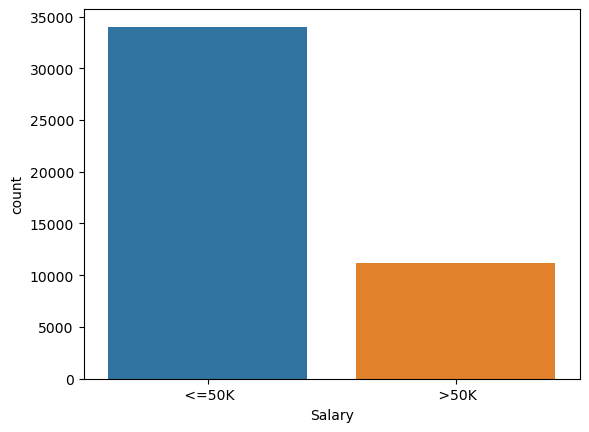

<Figure size 1600x900 with 0 Axes>

In [33]:
# Distribution of Salary
sns.countplot(x='Salary', data=data)
plt.figure(figsize=(16,9))
plt.show()



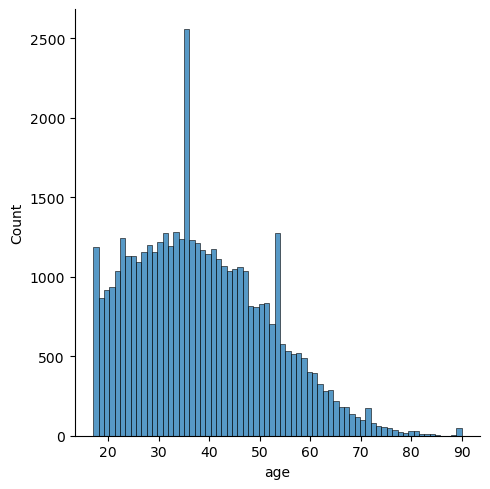

<Figure size 1600x900 with 0 Axes>

In [38]:
# Distribution of Age
sns.displot(data['age'])
plt.figure(figsize =(16,9))
plt.show()

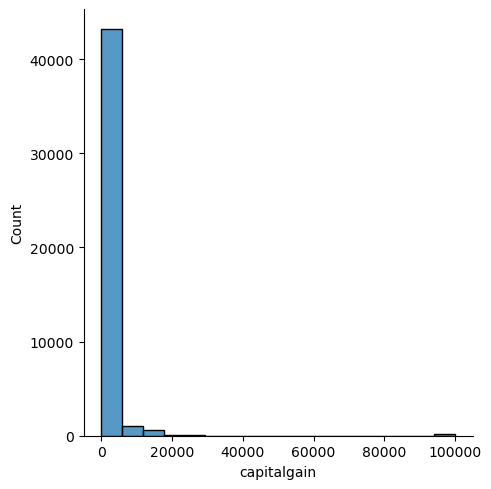

<Figure size 1600x900 with 0 Axes>

In [39]:
# Distribution of Capital Gain
sns.displot(data['capitalgain'])
plt.figure(figsize =(16,9))
plt.show()

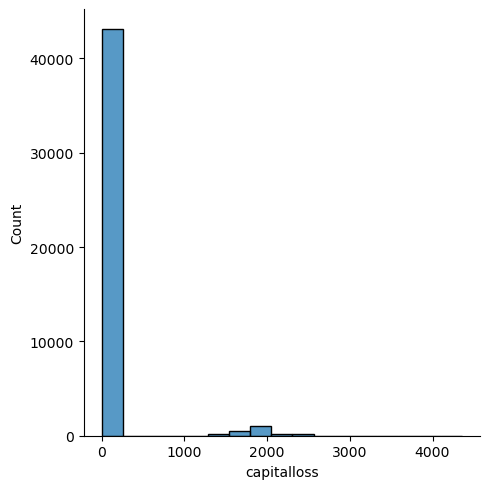

<Figure size 1600x900 with 0 Axes>

In [40]:
# Distribution of Capital Loss
sns.displot(data['capitalloss'])
plt.figure(figsize =(16,9))
plt.show()

<Figure size 1600x900 with 0 Axes>

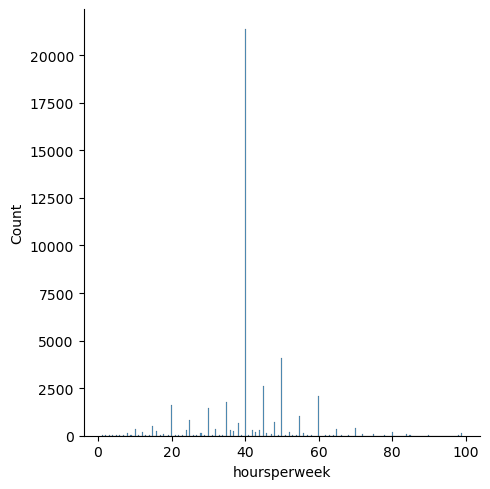

In [42]:
# Distribution of Hours per Week


plt.figure(figsize =(16,9))
sns.displot(data['hoursperweek'])
plt.show()

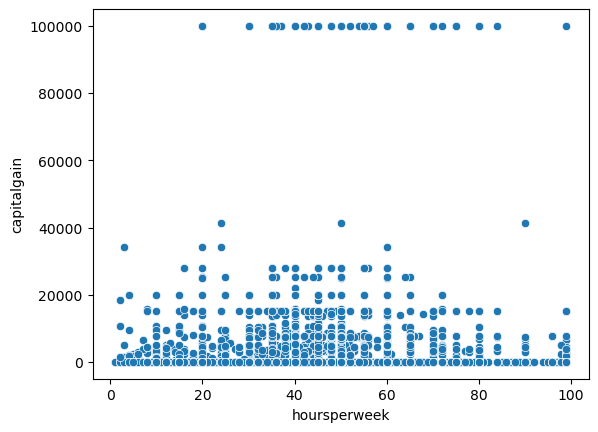

In [46]:
# Plot scatterplot of hoursperweek vs. capitalgain
sns.scatterplot(x='hoursperweek', y='capitalgain', data=data)
plt.show()

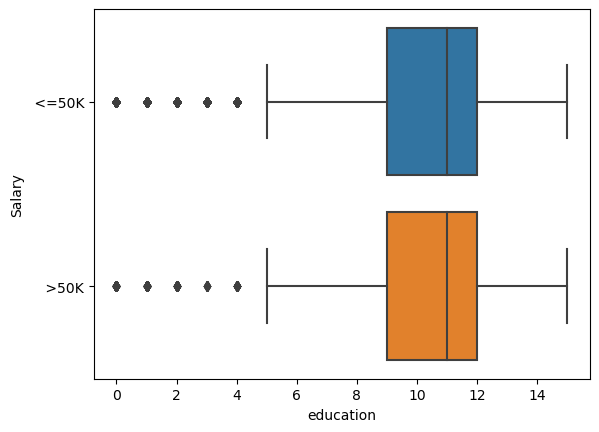

In [62]:
sns.boxplot(x='education', y='Salary', data=data)
plt.show()

#### **Encode categorical variables**

In [51]:
cat_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

#### **Split data into training and testing sets**

In [54]:
X = data.drop('Salary', axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Select top 5 features using chi-squared test**

In [55]:
kbest = SelectKBest(score_func=chi2, k=5)
X_train = kbest.fit_transform(X_train, y_train)
X_test = kbest.transform(X_test)

#### **Train SVM model**

In [56]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

#### **Predict target variable using test data**

In [57]:
y_pred = svm.predict(X_test)

#### **Evaluate model performance**

In [60]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7943615257048093


In [65]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6578  228]
 [1632  607]]
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      6806
        >50K       0.73      0.27      0.39      2239

    accuracy                           0.79      9045
   macro avg       0.76      0.62      0.64      9045
weighted avg       0.78      0.79      0.76      9045

